In [1]:
# What version of Python do you have?
import sys

import tensorflow.keras
import pandas as pd
import sklearn as sk
import tensorflow as tf

print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tensorflow.keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

Tensor Flow Version: 2.10.1
Keras Version: 2.10.0

Python 3.9.19 (main, Mar 21 2024, 17:21:27) [MSC v.1916 64 bit (AMD64)]
Pandas 2.2.1
Scikit-Learn 1.3.0
GPU is available


In [2]:
import yaml
import os
import cv2
import numpy as np

def parse_dataset_yaml(dataset_yaml_path):
    with open(dataset_yaml_path, 'r') as file:
        dataset_config = yaml.safe_load(file)
    
    train_images_path = os.path.join(dataset_config['path'], dataset_config['train'], 'images')
    train_labels_path = os.path.join(dataset_config['path'], dataset_config['train'], 'labels')
    val_images_path = os.path.join(dataset_config['path'], dataset_config['val'], 'images')
    val_labels_path = os.path.join(dataset_config['path'], dataset_config['val'], 'labels')
    
    return train_images_path, train_labels_path, val_images_path, val_labels_path

def read_labels(label_file):
    with open(label_file, 'r') as file:
        lines = file.readlines()
        
    maxLabel = [0, 0, 0]  # Initialize maxLabel list with zeros for each class
    
    for line in lines:
        line = line.strip().split()
        class_id = int(line[0])
        x_center, y_center, width, height = map(float, line[1:])
        # labels.append([class_id, x_center, y_center, width, height])
        if class_id == 0 or class_id == 3:
            maxLabel[0] += 1
        elif class_id == 1 or class_id == 4:
            maxLabel[1] += 1
        elif class_id == 2 or class_id == 5:
            maxLabel[2] += 1
    
    return maxLabel.index(max(maxLabel))

def preprocess_image(image_path, target_size=(224, 224)):
    # Read the original image
    image = cv2.imread(image_path)
    
    # Calculate aspect ratio
    original_height, original_width = image.shape[:2]
    target_width, target_height = target_size
    aspect_ratio = original_width / original_height
    
    # Determine new dimensions while preserving aspect ratio
    if aspect_ratio > 1:  # Landscape orientation
        new_width = target_width
        new_height = int(new_width / aspect_ratio)
    else:  # Portrait or square orientation
        new_height = target_height
        new_width = int(new_height * aspect_ratio)
    
    # Resize the image
    image = cv2.resize(image, (new_width, new_height))
    
    # Pad the image if necessary to match the target size
    top_pad = (target_height - new_height) // 2
    bottom_pad = target_height - new_height - top_pad
    left_pad = (target_width - new_width) // 2
    right_pad = target_width - new_width - left_pad
    image = cv2.copyMakeBorder(image, top_pad, bottom_pad, left_pad, right_pad, cv2.BORDER_CONSTANT, value=0)
    
    # Normalize image
    image = image / 255.0
    
    return image


# def preprocess_labels(labels, num_classes):
#     # Convert YOLO format labels to the format required by the model
#     # For example, if you're using a model like YOLOv3, you may need to convert them to anchor box format
    
#     # Placeholder function, adjust as per your model requirements
#     return labels

# Parse dataset.yaml file
train_images_path, train_labels_path, val_images_path, val_labels_path = parse_dataset_yaml('C:/Users/deonv/Desktop/ADT/Project/object-det-tomato/tomato-dataset/dataset.yaml')

# Read training images and labels
train_images = []
train_labels = []

for image_file in os.listdir(train_images_path):
    image_path = os.path.join(train_images_path, image_file)
    label_path = os.path.join(train_labels_path, image_file.replace('.jpg', '.txt'))
    
    if os.path.isfile(label_path):
        image = preprocess_image(image_path)
        label = read_labels(label_path)
        
        train_images.append(image)
        train_labels.append(label)


train_images = np.array(train_images)
train_labels = np.array(train_labels)

# Read validation images and labels
val_images = []
val_labels = []

for image_file in os.listdir(val_images_path):
    image_path = os.path.join(val_images_path, image_file)
    label_path = os.path.join(val_labels_path, image_file.replace('.jpg', '.txt'))
    
    if os.path.isfile(label_path):
        image = preprocess_image(image_path)
        label = read_labels(label_path)
        
        val_images.append(image)
        val_labels.append(label)

val_images = np.array(val_images)
val_labels = np.array(val_labels)

# Preprocess labels (if necessary)
# train_labels = preprocess_labels(train_labels, num_classes=6)
# val_labels = preprocess_labels(val_labels, num_classes=6)


In [3]:
print(train_labels)
print(train_images.shape)

print(val_labels)
print(val_images.shape)

[2 1 1 0 2 0 2 2 2 0 2 2 2 2 1 2 0 2 1 2 2 2 2 2 1 1 2 0 2 2 1 2 2 2 1 2 0
 1 1 2 2 2 2 2 2 2 1 2 2 2 2 0 1 1 2 2 2 2 2 1 1 0 1 0 1 2 0 0 1 2 2 2 2 0
 2 0 0 0 0 2 0 2 2 0 2 0 0 2 2 0 1 2 1 2 2 2 2 2 2 2 2 2 2 1 2 2 2 0 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 0 2 2 2 1 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 0 2 2 2 0 0 2 2 2 2 0 2 2 2 0 0
 0 2 2 0 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 0 2 2 2 2
 2 2 0 2 2 2 2 1 1 1 1 1 2 0 0 1 2 2 2 2 2 0 1 2 2 2 2 2 2 2 2 2 1 0 2 0 2
 1 2 2 0 2 1 2 2 1 1 1 1 2 2 1 0 2 2 2 0 1 0 0 2 0 1 0 2 0 2 2 0 0 1 2 2 2
 2 2 0 2 1 0 2 0 0 2 2 0 0 0 2 0 1 1 1 0 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 0 2
 2 2 0 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 1 2 2 2 2
 0 1 2 2 2 2 1 2 2 2 2 2 2 2 2 1 2 0 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 1 1 1 2 0 2 2 2 2 2 1 2 1 2 2 2 0 2 0 0 2 0
 2 2 2 2 2 1 2 2 2 2 2 2 2 1 2 2 2 1 1 1 1 2 1 2 2 2 2 0 2 1 2 1 1 2 1 2 1
 0 2 2 0 1 0 2 2 2 2 2 2 

In [5]:
# This is not working
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator instance for data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,      # Random rotation up to 20 degrees
    width_shift_range=0.1,  # Random horizontal shift by up to 10%
    height_shift_range=0.1, # Random vertical shift by up to 10%
    zoom_range=0.1,         # Random zoom by up to 10%
    horizontal_flip=True,   # Random horizontal flip
    vertical_flip=True      # Random vertical flip
)

# Fit the ImageDataGenerator to the training data
datagen.fit(train_images)

# Create a generator for augmented data
augmented_data_generator = datagen.flow(train_images, train_labels, batch_size=32)

In [1]:
#Good but not too good
from tensorflow.keras.layers.experimental.preprocessing import RandomRotation, RandomTranslation, RandomZoom, RandomFlip
from tensorflow.keras.applications import ResNet152
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.utils.class_weight import compute_class_weight

# Load the pre-trained ResNet152 model without the top (fully connected) layers
base_model = ResNet152(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze most of the pre-trained layers
for layer in base_model.layers[:-25]:
    layer.trainable = False

# Create a Sequential model for adding layers
model = Sequential()

# Add the ResNet152 base model
model.add(base_model)

# Add data augmentation layers directly to the model
model.add(RandomRotation(factor=0.2))  # Random rotation up to 20 degrees
model.add(RandomTranslation(height_factor=0.1, width_factor=0.1))  # Random horizontal and vertical translation by up to 10%
model.add(RandomZoom(height_factor=0.1, width_factor=0.1))  # Random zoom by up to 10%
model.add(RandomFlip(mode='horizontal'))  # Random horizontal flip
model.add(RandomFlip(mode='vertical'))  # Random vertical flip

# Add a global average pooling layer to reduce the number of parameters
model.add(GlobalAveragePooling2D())

# Add a convolutional layer to retain spatial information
# model.add(Conv2D(512, (3, 3), activation='relu'))

# # Add dense layers with dropout
# model.add(Flatten())  # Flatten the output of the convolutional layer

# Add dense layers with dropout
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.3))

# Add more dense layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))

# Add output layer
model.add(Dense(3, activation='softmax'))

# Compile the model
optimizer = Adam(learning_rate=0.007)  # Adjust the learning rate as needed
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Compute class weights
class_weights = compute_class_weight('balanced',  classes = np.unique(train_labels), y=train_labels)

# Convert class weights to a dictionary
class_weights_dict = dict(enumerate(class_weights))

# Train the model with class weights
history = model.fit(train_images, train_labels, batch_size=32, epochs=94, validation_data=(val_images, val_labels), class_weight=class_weights_dict)

# Evaluate the model
loss, accuracy = model.evaluate(val_images, val_labels)
print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)


KeyboardInterrupt: 

In [ ]:
# Testing
from tensorflow.keras.layers.experimental.preprocessing import RandomRotation, RandomTranslation, RandomZoom, RandomFlip
from tensorflow.keras.applications import ResNet152
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.utils.class_weight import compute_class_weight

# Load the pre-trained ResNet152 model without the top (fully connected) layers
base_model = ResNet152(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze most of the pre-trained layers
for layer in base_model.layers[:-25]:
    layer.trainable = False

# Create a Sequential model for adding layers
model = Sequential()

# Add the ResNet152 base model
model.add(base_model)

# Add data augmentation layers directly to the model
model.add(RandomRotation(factor=0.2))  # Random rotation up to 20 degrees
model.add(RandomTranslation(height_factor=0.1, width_factor=0.1))  # Random horizontal and vertical translation by up to 10%
model.add(RandomZoom(height_factor=0.1, width_factor=0.1))  # Random zoom by up to 10%
model.add(RandomFlip(mode='horizontal'))  # Random horizontal flip
model.add(RandomFlip(mode='vertical'))  # Random vertical flip

# Add a global average pooling layer to reduce the number of parameters
model.add(GlobalAveragePooling2D())

# Add a convolutional layer to retain spatial information
# model.add(Conv2D(512, (3, 3), activation='relu'))

# # Add dense layers with dropout
# model.add(Flatten())  # Flatten the output of the convolutional layer

# Add dense layers with dropout
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.3))

# Add more dense layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))

# Add output layer
model.add(Dense(3, activation='softmax'))

# Compile the model
optimizer = Adam(learning_rate=0.007)  # Adjust the learning rate as needed
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


# Train the model with class weights
history = model.fit(train_images, train_labels, batch_size=32, epochs=100, validation_data=(val_images, val_labels), class_weight='balanced')

# Evaluate the model
loss, accuracy = model.evaluate(val_images, val_labels)
print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)


In [8]:
from imblearn.over_sampling import SMOTE

# Reshape train_images for SMOTE
train_images_reshaped = train_images.reshape(train_images.shape[0], -1)

# Apply SMOTE to the training data
smote = SMOTE()
train_images_resampled, train_labels_resampled = smote.fit_resample(train_images_reshaped, train_labels)

# Reshape the resampled images back to their original shape
train_images_resampled = train_images_resampled.reshape(-1, 224, 224, 3)

# Check the new shape of the resampled data
print("Shape of resampled images:", train_images_resampled.shape)
print("Shape of resampled labels:", train_labels_resampled.shape)

Shape of resampled images: (1389, 224, 224, 3)
Shape of resampled labels: (1389,)


In [8]:
#Add SMOTE --> 62 % accuracy 
from tensorflow.keras.layers.experimental.preprocessing import RandomRotation, RandomTranslation, RandomZoom, RandomFlip
from tensorflow.keras.applications import ResNet152
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.utils.class_weight import compute_class_weight

# Load the pre-trained ResNet152 model without the top (fully connected) layers
base_model = ResNet152(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze most of the pre-trained layers
for layer in base_model.layers[:-25]:
    layer.trainable = False

# Create a Sequential model for adding layers
model = Sequential()

# Add the ResNet152 base model
model.add(base_model)

# Add data augmentation layers directly to the model
model.add(RandomRotation(factor=0.2))  # Random rotation up to 20 degrees
model.add(RandomTranslation(height_factor=0.1, width_factor=0.1))  # Random horizontal and vertical translation by up to 10%
model.add(RandomZoom(height_factor=0.1, width_factor=0.1))  # Random zoom by up to 10%
model.add(RandomFlip(mode='horizontal'))  # Random horizontal flip
model.add(RandomFlip(mode='vertical'))  # Random vertical flip

# Add a global average pooling layer to reduce the number of parameters
model.add(GlobalAveragePooling2D())

# Add a convolutional layer to retain spatial information
# model.add(Conv2D(512, (3, 3), activation='relu'))

# # Add dense layers with dropout
# model.add(Flatten())  # Flatten the output of the convolutional layer

# Add dense layers with dropout
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.3))

# Add more dense layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))

# Add output layer
model.add(Dense(3, activation='softmax'))

# Compile the model
optimizer = Adam(learning_rate=0.007)  # Adjust the learning rate as needed
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Compute class weights
class_weights = compute_class_weight('balanced',  classes = np.unique(train_labels), y=train_labels)

# Convert class weights to a dictionary
class_weights_dict = dict(enumerate(class_weights))

# Train the model with class weights
history = model.fit(train_images_resampled, train_labels_resampled, batch_size=32, epochs=94, validation_data=(val_images, val_labels), class_weight=class_weights_dict)

# Evaluate the model
loss, accuracy = model.evaluate(val_images, val_labels)
print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152 (Functional)      (None, 7, 7, 2048)        58370944  
                                                                 
 random_rotation (RandomRota  (None, 7, 7, 2048)       0         
 tion)                                                           
                                                                 
 random_translation (RandomT  (None, 7, 7, 2048)       0         
 ranslation)                                                     
                                                                 
 random_zoom (RandomZoom)    (None, 7, 7, 2048)        0         
                                                                 
 random_flip (RandomFlip)    (None, 7, 7, 2048)        0         
                                                                 
 random_flip_1 (RandomFlip)  (None, 7, 7, 2048)        0

C:\Users\deonv\anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential/random_zoom/loop_body/GatherV2/pfor/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential/random_zoom/loop_body/GatherV2/pfor/Reshape:0", shape=(None, 7, 7, 2048), dtype=float32), dense_shape=Tensor("gradient_tape/sequential/random_zoom/loop_body/GatherV2/pfor/Cast:0", shape=(4,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(
C:\Users\deonv\anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential/random_rotation/loop_body/GatherV2/pfor/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential/random_rotation/loop_body/GatherV2/pfor/Reshape:0",

44/44 [==============================] - 132s 2s/step - loss: 4.5968 - accuracy: 0.3362 - val_loss: 7.9567 - val_accuracy: 0.1242
Epoch 2/94
44/44 [==============================] - 64s 1s/step - loss: 1.5518 - accuracy: 0.3312 - val_loss: 1.4415 - val_accuracy: 0.1242
Epoch 3/94
44/44 [==============================] - 67s 2s/step - loss: 1.3826 - accuracy: 0.4500 - val_loss: 1.1821 - val_accuracy: 0.1615
Epoch 4/94
44/44 [==============================] - 68s 2s/step - loss: 1.1995 - accuracy: 0.5673 - val_loss: 1.9394 - val_accuracy: 0.1863
Epoch 5/94
44/44 [==============================] - 69s 2s/step - loss: 1.0920 - accuracy: 0.5796 - val_loss: 4.4505 - val_accuracy: 0.1615
Epoch 6/94
44/44 [==============================] - 70s 2s/step - loss: 0.7940 - accuracy: 0.6386 - val_loss: 13.2191 - val_accuracy: 0.1242
Epoch 7/94
44/44 [==============================] - 71s 2s/step - loss: 0.9021 - accuracy: 0.6746 - val_loss: 5.2053 - val_accuracy: 0.1615
Epoch 8/94
44/44 [===========

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152 (Functional)      (None, 7, 7, 2048)        58370944  
                                                                 
 random_rotation (RandomRota  (None, 7, 7, 2048)       0         
 tion)                                                           
                                                                 
 random_translation (RandomT  (None, 7, 7, 2048)       0         
 ranslation)                                                     
                                                                 
 random_zoom (RandomZoom)    (None, 7, 7, 2048)        0         
                                                                 
 random_flip (RandomFlip)    (None, 7, 7, 2048)        0         
                                                                 
 random_flip_1 (RandomFlip)  (None, 7, 7, 2048)        0

C:\Users\deonv\anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential/random_zoom/loop_body/GatherV2/pfor/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential/random_zoom/loop_body/GatherV2/pfor/Reshape:0", shape=(None, 7, 7, 2048), dtype=float32), dense_shape=Tensor("gradient_tape/sequential/random_zoom/loop_body/GatherV2/pfor/Cast:0", shape=(4,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(
C:\Users\deonv\anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential/random_rotation/loop_body/GatherV2/pfor/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential/random_rotation/loop_body/GatherV2/pfor/Reshape:0",

44/44 [==============================] - 90s 2s/step - loss: 3.8486 - accuracy: 0.3463 - val_loss: 211.6121 - val_accuracy: 0.1242
Epoch 2/100
44/44 [==============================] - 63s 1s/step - loss: 1.4743 - accuracy: 0.4111 - val_loss: 30.8981 - val_accuracy: 0.1242
Epoch 3/100
44/44 [==============================] - 64s 1s/step - loss: 1.3399 - accuracy: 0.5054 - val_loss: 1.4875 - val_accuracy: 0.1491
Epoch 4/100
44/44 [==============================] - 67s 2s/step - loss: 1.0778 - accuracy: 0.5702 - val_loss: 1.6353 - val_accuracy: 0.1801
Epoch 5/100
44/44 [==============================] - 68s 2s/step - loss: 0.9766 - accuracy: 0.5680 - val_loss: 1.4793 - val_accuracy: 0.1677
Epoch 6/100
44/44 [==============================] - 73s 2s/step - loss: 0.8933 - accuracy: 0.6263 - val_loss: 54.4533 - val_accuracy: 0.1242
Epoch 7/100
44/44 [==============================] - 77s 2s/step - loss: 0.9134 - accuracy: 0.6084 - val_loss: 2.9515 - val_accuracy: 0.1118
Epoch 8/100
44/44 [==

44/44 [==============================] - 80s 2s/step - loss: 0.2661 - accuracy: 0.8560 - val_loss: 2.5112 - val_accuracy: 0.4037
Epoch 41/100
44/44 [==============================] - 78s 2s/step - loss: 0.1735 - accuracy: 0.9107 - val_loss: 2.0285 - val_accuracy: 0.4907
Epoch 42/100
44/44 [==============================] - 77s 2s/step - loss: 0.2678 - accuracy: 0.9028 - val_loss: 1.9918 - val_accuracy: 0.4783
Epoch 43/100
44/44 [==============================] - 78s 2s/step - loss: 0.2439 - accuracy: 0.8776 - val_loss: 2.5216 - val_accuracy: 0.4472
Epoch 44/100
44/44 [==============================] - 78s 2s/step - loss: 0.2244 - accuracy: 0.9042 - val_loss: 1.4114 - val_accuracy: 0.6211
Epoch 45/100
44/44 [==============================] - 78s 2s/step - loss: 0.3481 - accuracy: 0.8891 - val_loss: 6.3887 - val_accuracy: 0.2174
Epoch 46/100
44/44 [==============================] - 78s 2s/step - loss: 0.4187 - accuracy: 0.8582 - val_loss: 1.3579 - val_accuracy: 0.4224
Epoch 47/100
44/44 

Epoch 98/100
44/44 [==============================] - 83s 2s/step - loss: 0.0497 - accuracy: 0.9726 - val_loss: 2.1056 - val_accuracy: 0.5963
Epoch 99/100
44/44 [==============================] - 83s 2s/step - loss: 0.0242 - accuracy: 0.9878 - val_loss: 2.7330 - val_accuracy: 0.6335
Epoch 100/100
6/6 [==============================] - 3s 402ms/step - loss: 3.2267 - accuracy: 0.6646
Validation Loss: 3.226703643798828
Validation Accuracy: 0.6645962595939636


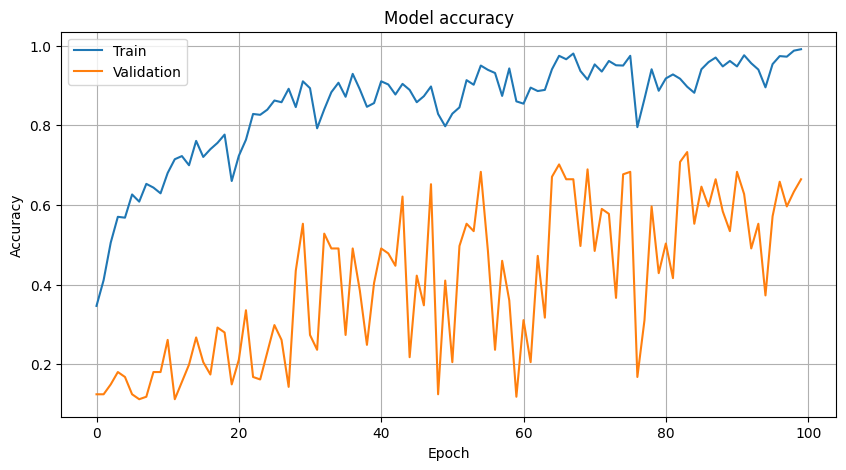

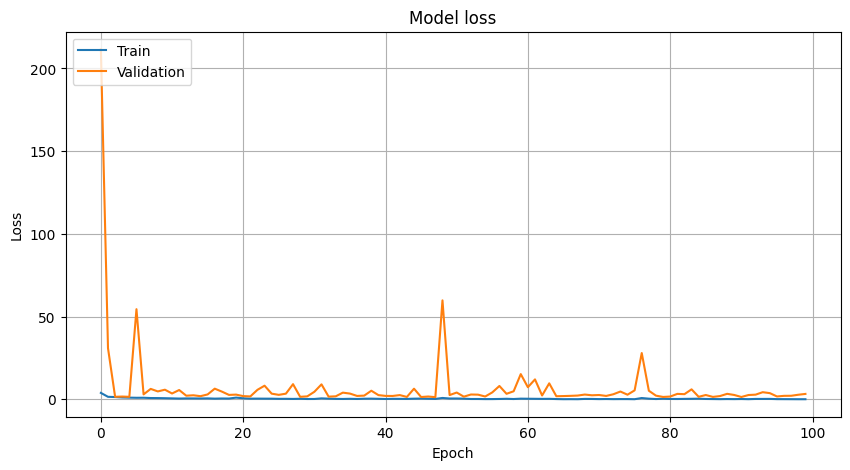

In [9]:
#Add SMOTE --> 100 epoch resnet152 --> 66.4%
from tensorflow.keras.layers.experimental.preprocessing import RandomRotation, RandomTranslation, RandomZoom, RandomFlip
from tensorflow.keras.applications import ResNet152
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.utils.class_weight import compute_class_weight

# Load the pre-trained ResNet152 model without the top (fully connected) layers
base_model = ResNet152(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze most of the pre-trained layers
for layer in base_model.layers[:-25]:
    layer.trainable = False

# Create a Sequential model for adding layers
model = Sequential()

# Add the ResNet152 base model
model.add(base_model)

# Add data augmentation layers directly to the model
model.add(RandomRotation(factor=0.2))  # Random rotation up to 20 degrees
model.add(RandomTranslation(height_factor=0.1, width_factor=0.1))  # Random horizontal and vertical translation by up to 10%
model.add(RandomZoom(height_factor=0.1, width_factor=0.1))  # Random zoom by up to 10%
model.add(RandomFlip(mode='horizontal'))  # Random horizontal flip
model.add(RandomFlip(mode='vertical'))  # Random vertical flip

# Add a global average pooling layer to reduce the number of parameters
model.add(GlobalAveragePooling2D())

# Add a convolutional layer to retain spatial information
# model.add(Conv2D(512, (3, 3), activation='relu'))

# # Add dense layers with dropout
# model.add(Flatten())  # Flatten the output of the convolutional layer

# Add dense layers with dropout
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.3))

# Add more dense layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))

# Add output layer
model.add(Dense(3, activation='softmax'))

# Compile the model
optimizer = Adam(learning_rate=0.007)  # Adjust the learning rate as needed
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Compute class weights
class_weights = compute_class_weight('balanced',  classes = np.unique(train_labels), y=train_labels)

# Convert class weights to a dictionary
class_weights_dict = dict(enumerate(class_weights))

# Train the model with class weights
history = model.fit(train_images_resampled, train_labels_resampled, batch_size=32, epochs=100, validation_data=(val_images, val_labels), class_weight=class_weights_dict)

# Evaluate the model
loss, accuracy = model.evaluate(val_images, val_labels)
print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)

# Import matplotlib
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(True)
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(True)
plt.show()


In [7]:
#Add SMOTE --> 100 epoch resnet50 
from tensorflow.keras.layers.experimental.preprocessing import RandomRotation, RandomTranslation, RandomZoom, RandomFlip
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.utils.class_weight import compute_class_weight

# Load the pre-trained ResNet152 model without the top (fully connected) layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze most of the pre-trained layers
for layer in base_model.layers[:-25]:
    layer.trainable = False

# Create a Sequential model for adding layers
model = Sequential()

# Add the ResNet152 base model
model.add(base_model)

# Add data augmentation layers directly to the model
model.add(RandomRotation(factor=0.2))  # Random rotation up to 20 degrees
model.add(RandomTranslation(height_factor=0.1, width_factor=0.1))  # Random horizontal and vertical translation by up to 10%
model.add(RandomZoom(height_factor=0.1, width_factor=0.1))  # Random zoom by up to 10%
model.add(RandomFlip(mode='horizontal'))  # Random horizontal flip
model.add(RandomFlip(mode='vertical'))  # Random vertical flip

# Add a global average pooling layer to reduce the number of parameters
model.add(GlobalAveragePooling2D())

# Add a convolutional layer to retain spatial information
# model.add(Conv2D(512, (3, 3), activation='relu'))

# # Add dense layers with dropout
# model.add(Flatten())  # Flatten the output of the convolutional layer

# Add dense layers with dropout
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.3))

# Add more dense layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))

# Add output layer
model.add(Dense(3, activation='softmax'))

# Compile the model
optimizer = Adam(learning_rate=0.007)  # Adjust the learning rate as needed
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Compute class weights
class_weights = compute_class_weight('balanced',  classes = np.unique(train_labels), y=train_labels)

# Convert class weights to a dictionary
class_weights_dict = dict(enumerate(class_weights))

# Train the model with class weights
history = model.fit(train_images_resampled, train_labels_resampled, batch_size=32, epochs=94, validation_data=(val_images, val_labels), class_weight=class_weights_dict)

# Evaluate the model
loss, accuracy = model.evaluate(val_images, val_labels)
print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 random_rotation_1 (RandomRo  (None, 7, 7, 2048)       0         
 tation)                                                         
                                                                 
 random_translation_1 (Rando  (None, 7, 7, 2048)       0         
 mTranslation)                                                   
                                                                 
 random_zoom_1 (RandomZoom)  (None, 7, 7, 2048)        0         
                                                                 
 random_flip_2 (RandomFlip)  (None, 7, 7, 2048)        0         
                                                                 
 random_flip_3 (RandomFlip)  (None, 7, 7, 2048)       

C:\Users\deonv\anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_1/random_zoom_1/loop_body/GatherV2/pfor/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_1/random_zoom_1/loop_body/GatherV2/pfor/Reshape:0", shape=(None, 7, 7, 2048), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_1/random_zoom_1/loop_body/GatherV2/pfor/Cast:0", shape=(4,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(
C:\Users\deonv\anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_1/random_rotation_1/loop_body/GatherV2/pfor/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_1/random_rotation_1/loop_body/Gathe

44/44 [==============================] - 75s 1s/step - loss: 3.9152 - accuracy: 0.3377 - val_loss: 89.9757 - val_accuracy: 0.7143
Epoch 2/94
44/44 [==============================] - 58s 1s/step - loss: 1.4517 - accuracy: 0.4161 - val_loss: 81.7456 - val_accuracy: 0.1242
Epoch 3/94
44/44 [==============================] - 62s 1s/step - loss: 1.2714 - accuracy: 0.4953 - val_loss: 43.6119 - val_accuracy: 0.1242
Epoch 4/94
44/44 [==============================] - 65s 1s/step - loss: 1.2273 - accuracy: 0.5162 - val_loss: 9.6929 - val_accuracy: 0.1304
Epoch 5/94
44/44 [==============================] - 63s 1s/step - loss: 0.9437 - accuracy: 0.5846 - val_loss: 1.6802 - val_accuracy: 0.1366
Epoch 6/94
44/44 [==============================] - 62s 1s/step - loss: 0.9684 - accuracy: 0.5954 - val_loss: 24.5991 - val_accuracy: 0.1242
Epoch 7/94
44/44 [==============================] - 61s 1s/step - loss: 1.1485 - accuracy: 0.5457 - val_loss: 7.4953 - val_accuracy: 0.1491
Epoch 8/94
44/44 [=========

In [ ]:
def preprocess_image(image_path, target_size=(224, 224)):
    # Read the original image
    image = cv2.imread(image_path)
    
    # Calculate aspect ratio
    original_height, original_width = image.shape[:2]
    target_width, target_height = target_size
    aspect_ratio = original_width / original_height
    
    # Determine new dimensions while preserving aspect ratio
    if aspect_ratio > 1:  # Landscape orientation
        new_width = target_width
        new_height = int(new_width / aspect_ratio)
    else:  # Portrait or square orientation
        new_height = target_height
        new_width = int(new_height * aspect_ratio)
    
    # Resize the image
    image = cv2.resize(image, (new_width, new_height))
    
    # Pad the image if necessary to match the target size
    top_pad = (target_height - new_height) // 2
    bottom_pad = target_height - new_height - top_pad
    left_pad = (target_width - new_width) // 2
    right_pad = target_width - new_width - left_pad
    image = cv2.copyMakeBorder(image, top_pad, bottom_pad, left_pad, right_pad, cv2.BORDER_CONSTANT, value=0)
    
    # Normalize image
    image = image / 255.0
    
    return image

def preprocess_image_display(image_path, target_size=(500, 500)):
    # Read the original image
    image = cv2.imread(image_path)
    
    # Calculate aspect ratio
    original_height, original_width = image.shape[:2]
    target_width, target_height = target_size
    aspect_ratio = original_width / original_height
    
    # Determine new dimensions while preserving aspect ratio
    if aspect_ratio > 1:  # Landscape orientation
        new_width = target_width
        new_height = int(new_width / aspect_ratio)
    else:  # Portrait or square orientation
        new_height = target_height
        new_width = int(new_height * aspect_ratio)
    
    # Resize the image
    image = cv2.resize(image, (new_width, new_height))
    
    # Pad the image if necessary to match the target size
    top_pad = (target_height - new_height) // 2
    bottom_pad = target_height - new_height - top_pad
    left_pad = (target_width - new_width) // 2
    right_pad = target_width - new_width - left_pad
    image = cv2.copyMakeBorder(image, top_pad, bottom_pad, left_pad, right_pad, cv2.BORDER_CONSTANT, value=0)
    return image

# Example usage:
image_path = "C:/Users/deonv/Desktop/ADT/Project/object-det-tomato/tomato-dataset/val/images/IMG_0986.jpg"
preprocessed_image = preprocess_image(image_path)

# Reshape the image to match the input shape of the model
preprocessed_image = np.expand_dims(preprocessed_image, axis=0)

# Make predictions
predictions = model.predict(preprocessed_image)

# Get the predicted class
predicted_class = np.argmax(predictions)

# Print the predicted class
print("Predicted Class:", predicted_class)
# Define a dictionary mapping class indices to corresponding labels
class_labels = {
    0: "Ripened",
    1: "Half Ripened",
    2: "Green"
}
# Print the predicted class
predicted_label = class_labels.get(predicted_class, "Unknown")
print(predicted_label)

image = preprocess_image_display(image_path)
cv2.imshow('Object Detection', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

1/1 [==============================] - 5s 5s/step
Predicted Class: 0
Ripened


In [11]:
# Define the file path where you want to save the model
model_path = 'resnet_model152.h5'

# Save the model
model.save(model_path)

print("Model saved successfully at:", model_path)

Model saved successfully at: resnet_model152.h5


In [5]:
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('resnet_model.h5')


In [4]:
# Evaluate the model
loss, accuracy = model.evaluate(val_images, val_labels)
print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)

6/6 [==============================] - 11s 441ms/step - loss: 1.3302 - accuracy: 0.6211
Validation Loss: 1.3301645517349243
Validation Accuracy: 0.6211180090904236


6/6 [==============================] - 3s 244ms/step


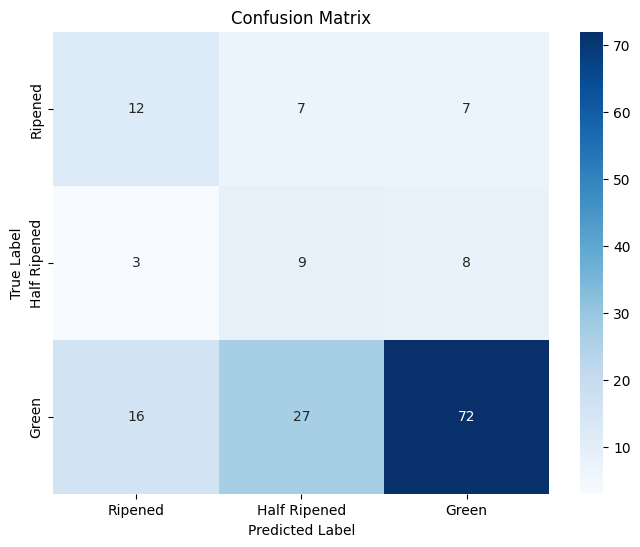

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict labels for validation images
val_predictions = model.predict(val_images)
val_predicted_labels = np.argmax(val_predictions, axis=1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(val_labels, val_predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=['Ripened', 'Half Ripened', 'Green'], yticklabels=['Ripened', 'Half Ripened', 'Green'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

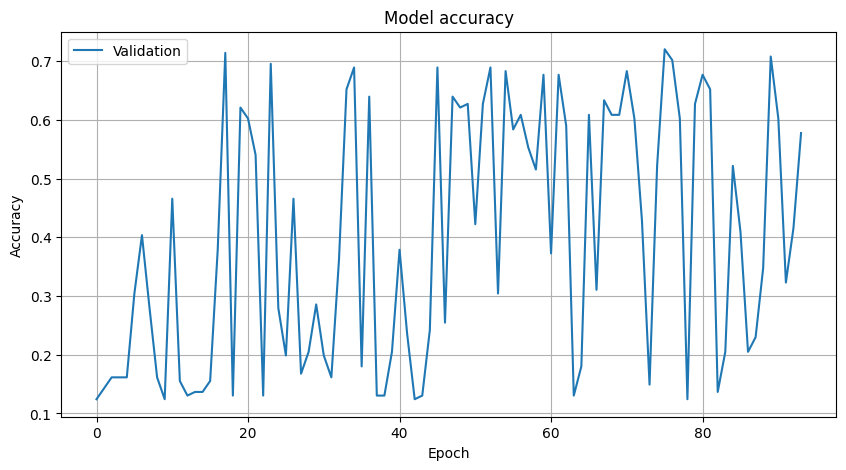

In [20]:
# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Validation'], loc='upper left')
plt.grid(True)
plt.show()